# REST weather data Plotting

Get Sydney weather data from the tomorrow.io through REST API

In [1]:
import requests
import yaml
import json

with open("config.yml", 'r') as ymlfile:
    cfg = yaml.safe_load(ymlfile)

# Read API key    
api_key = cfg['api_creds']['tomorrow_key']

url = "https://api.tomorrow.io/v4/timelines"
location = "33.8688, 151.2093"

querystring = {
    "location":location,  #"33, -84",
    "fields":["temperature", "cloudCover"],
    "units":"imperial",
    "timesteps":"1d",
    "apikey":api_key
}

response = requests.request("GET", url, params=querystring)
print(json.dumps(response.json(), indent=3, sort_keys=True))

{
   "data": {
      "timelines": [
         {
            "endTime": "2021-12-06T20:00:00Z",
            "intervals": [
               {
                  "startTime": "2021-11-21T20:00:00Z",
                  "values": {
                     "cloudCover": 100,
                     "temperature": 73
                  }
               },
               {
                  "startTime": "2021-11-22T20:00:00Z",
                  "values": {
                     "cloudCover": 100,
                     "temperature": 73.08
                  }
               },
               {
                  "startTime": "2021-11-23T20:00:00Z",
                  "values": {
                     "cloudCover": 69.53,
                     "temperature": 69.24
                  }
               },
               {
                  "startTime": "2021-11-24T20:00:00Z",
                  "values": {
                     "cloudCover": 93.4,
                     "temperature": 68.47
                  }
         

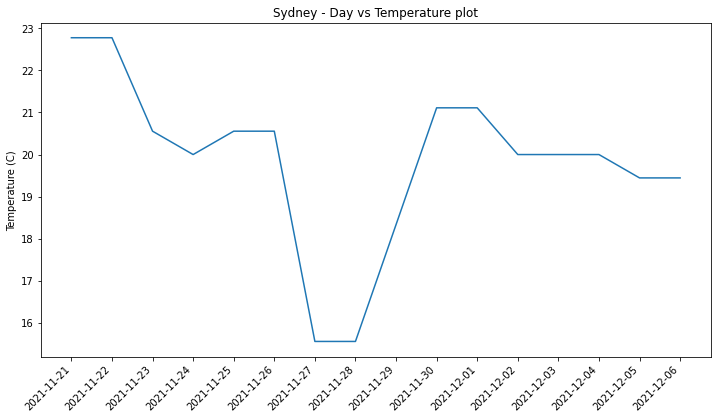

In [2]:
import matplotlib.pyplot as plt
import math

# Read data

xs = []
ys = []    
results = response.json()['data'] ['timelines'] [0] ['intervals']
for day_data in results:
    date = day_data ['startTime'][0:10]  
    f = float( round (day_data ['values']['temperature']) )
    temp = (f-32)*5/9 
   
    xs.append (date)
    ys.append (temp) 
    #print (date, temp)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(xs, ys)

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.30)
plt.title('Sydney - Day vs Temperature plot')
plt.ylabel('Temperature (C)')

# Draw the graph
plt.show()

#### Melbourne weather data plot

In [3]:
location = "37.8136, 144.9631" # Melbourne

querystring = {
    "location":location,  
    "fields":["temperature", "cloudCover"],
    "units":"imperial",
    "timesteps":"1d",
    "apikey":api_key
}

response = requests.request("GET", url, params=querystring)
results = response.json()['data'] ['timelines'] [0] ['intervals']

xs = [day_data ['startTime'][0:10]  for day_data in results]
ys = [(float(day_data ['values']['temperature']) - 32)*5/9 for day_data in results] 
#print (xs, '\n', ys)

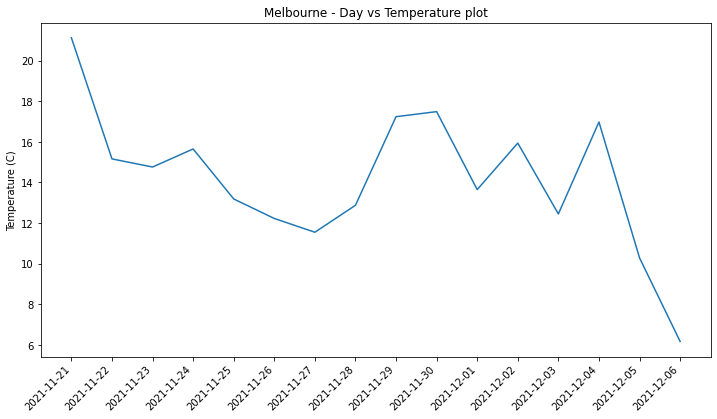

In [4]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)

ax.plot(xs, ys)

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.30)
plt.title('Melbourne - Day vs Temperature plot')
plt.ylabel('Temperature (C)')

# Draw the graph
plt.show()